In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, bartlett
from  statsmodels.stats.outliers_influence import variance_inflation_factor
from  statsmodels.formula.api import ols
from sklearn.feature_selection import f_regression
import seaborn as sns

In [96]:
df = pd.read_csv("diamonds.csv")
# df.head()

In [97]:
df.shape

(6485, 18)

In [98]:
# Kiểm tra thông tin cơ bản về dữ liệu
df_info = df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6485 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6480 non-null   object 
 1   Cut                 2182 non-null   object 
 2   Color               6480 non-null   object 
 3   Clarity             6480 non-null   object 
 4   Carat Weight        6480 non-null   float64
 5   Length/Width Ratio  6480 non-null   float64
 6   Depth %             6478 non-null   float64
 7   Table %             6468 non-null   float64
 8   Polish              6465 non-null   object 
 9   Symmetry            6465 non-null   object 
 10  Girdle              6463 non-null   object 
 11  Culet               1891 non-null   object 
 12  Length              6465 non-null   float64
 13  Width               6465 non-null   float64
 14  Height              6465 non-null   float64
 15  Price               6485 non-null   int64  
 16  Type  

In [99]:
df_describe = df.describe()
df_describe

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price
count,6480.000000,6480.000000,6478.000000,6468.000000,6465.000000,6465.000000,6465.000000,6485.000000
mean,1.235772,1.329548,64.206499,61.828541,7.663595,6.098323,3.885708,3529.391365
std,0.506647,0.325707,4.773192,4.760197,1.674665,1.151152,0.599420,3280.439167
min,1.000000,1.000000,46.100000,51.000000,5.180000,4.420000,2.670000,1010.000000
25%,1.010000,1.020000,61.200000,58.000000,6.330000,5.390000,3.460000,1210.000000
50%,1.030000,1.270000,63.100000,61.000000,7.420000,5.640000,3.670000,3320.000000
75%,1.200000,1.510000,67.600000,65.000000,8.660000,6.610000,4.100000,4390.000000
max,9.380000,2.580000,77.000000,78.000000,15.210000,14.880000,8.170000,39460.000000


In [100]:
# Kiểm tra các dòng trùng lặp trong dữ liệu customer_churn
duplicates = df[df.duplicated()]
duplicates_count = duplicates.shape[0]

# Xóa các dòng trùng lặp và giữ lại dòng đầu tiên
df.drop_duplicates(keep='first', inplace=True)

# Kiểm tra lại số lượng trùng lặp sau khi xử lý
remaining_duplicates = df.duplicated().sum()

print('Dữ liệu trùng lặp : ',duplicates_count)
print('Dữ liệu sau khi sử lí trùng lặp:', remaining_duplicates)

Dữ liệu trùng lặp :  3
Dữ liệu sau khi sử lí trùng lặp: 0


In [101]:
df.head()

,Shape,Cut,Color,Clarity,Carat Weight,Length/Width Ratio,Depth %,Table %,Polish,Symmetry,Girdle,Culet,Length,Width,Height,Price,Type,Fluorescence
0,Cushion Modified,Ideal,F,VVS2,1.84,1.02,65.8,59.0,Excellent,Very Good,Medium to Thick,NaN,7.09,6.95,4.57,2640,GIA Lab-Grown,NaN
1,Pear,NaN,E,VS1,1.20,1.65,62.5,58.0,Very Good,Very Good,Medium to Thick,NaN,9.64,5.86,3.66,1070,GIA Lab-Grown,NaN
2,Oval,NaN,E,VS1,1.19,1.41,63.1,63.0,Very Good,Very Good,Medium to Thick,NaN,8.44,6.00,3.79,1070,GIA Lab-Grown,NaN
3,Heart,NaN,D,IF,1.00,1.18,61.7,58.0,Excellent,Excellent,Slightly Thick to Very Thick,NaN,5.85,6.89,4.25,7110,GIA,Faint
4,Radiant,NaN,H,VS1,1.01,1.35,69.4,66.0,Excellent,Very Good,Thick,NaN,6.80,5.05,3.50,3050,GIA,NaN


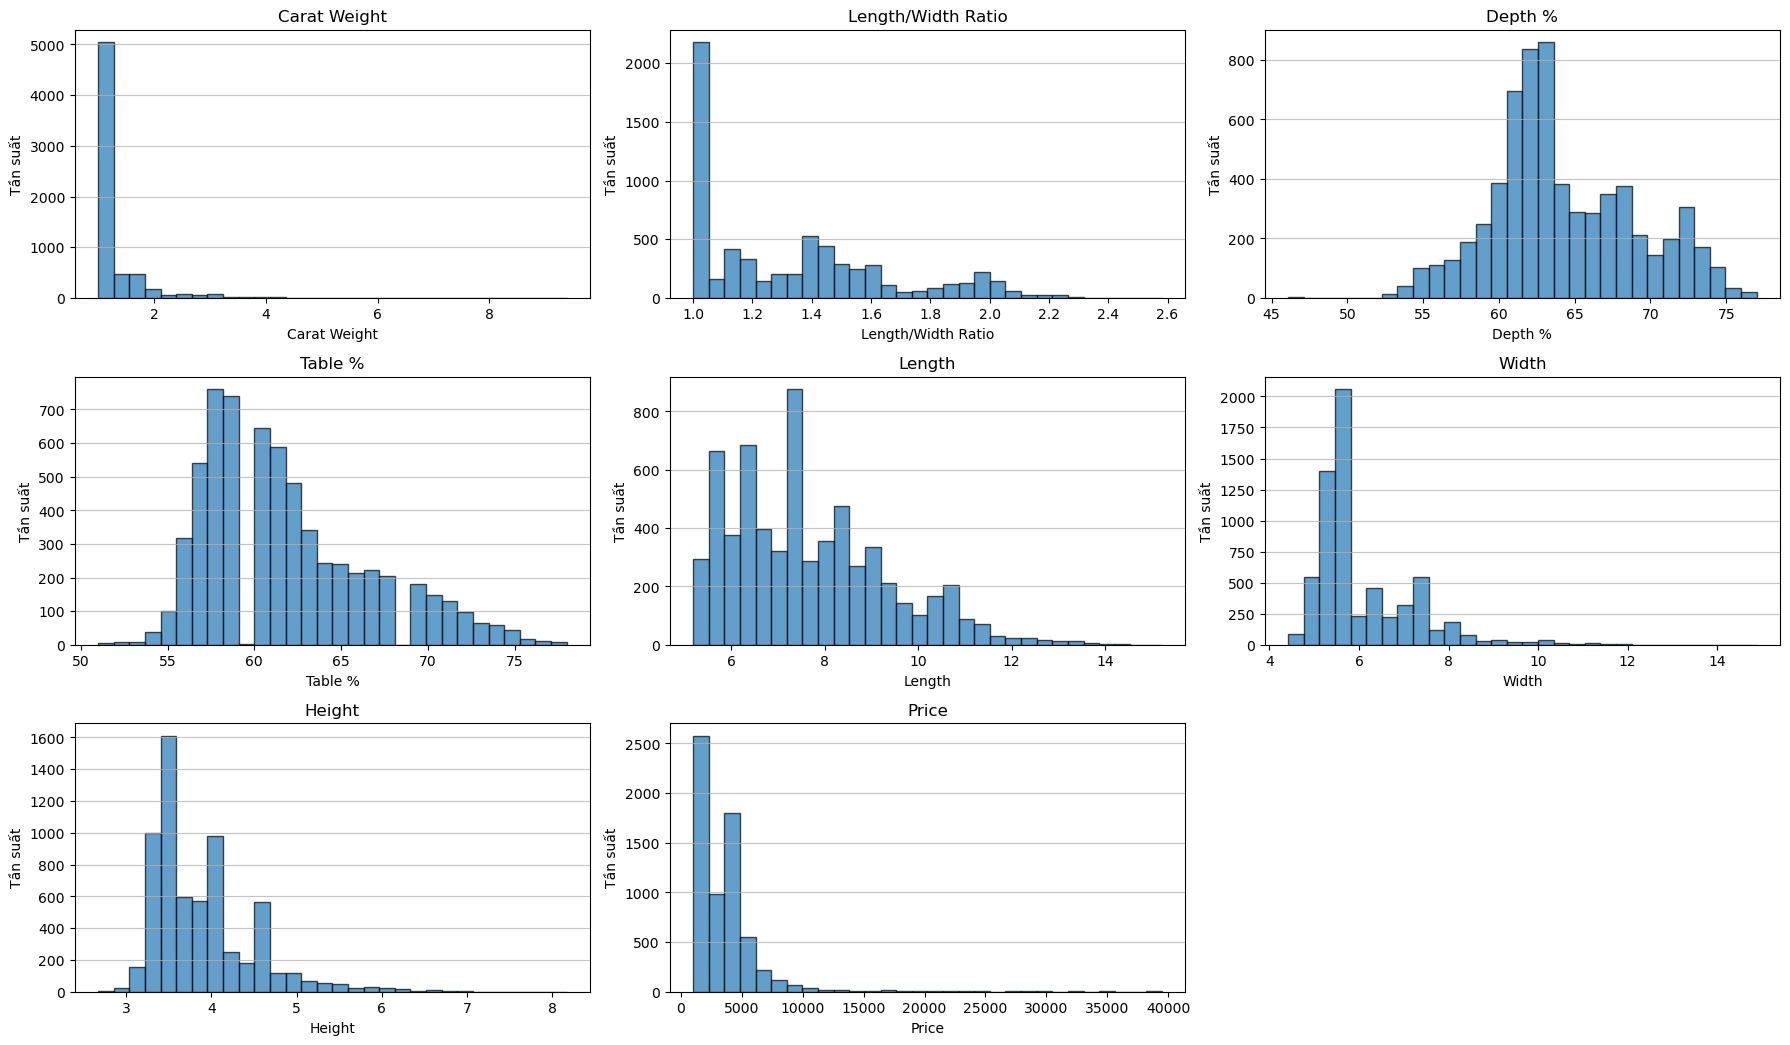

In [102]:

# Lọc các cột dạng số
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Vẽ biểu đồ histogram cho các cột dạng số
plt.figure(figsize=(18, 24))

for i, col in enumerate(numerical_cols):
    plt.subplot(7, 3, i + 1)
    plt.hist(df[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Tần suất')
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

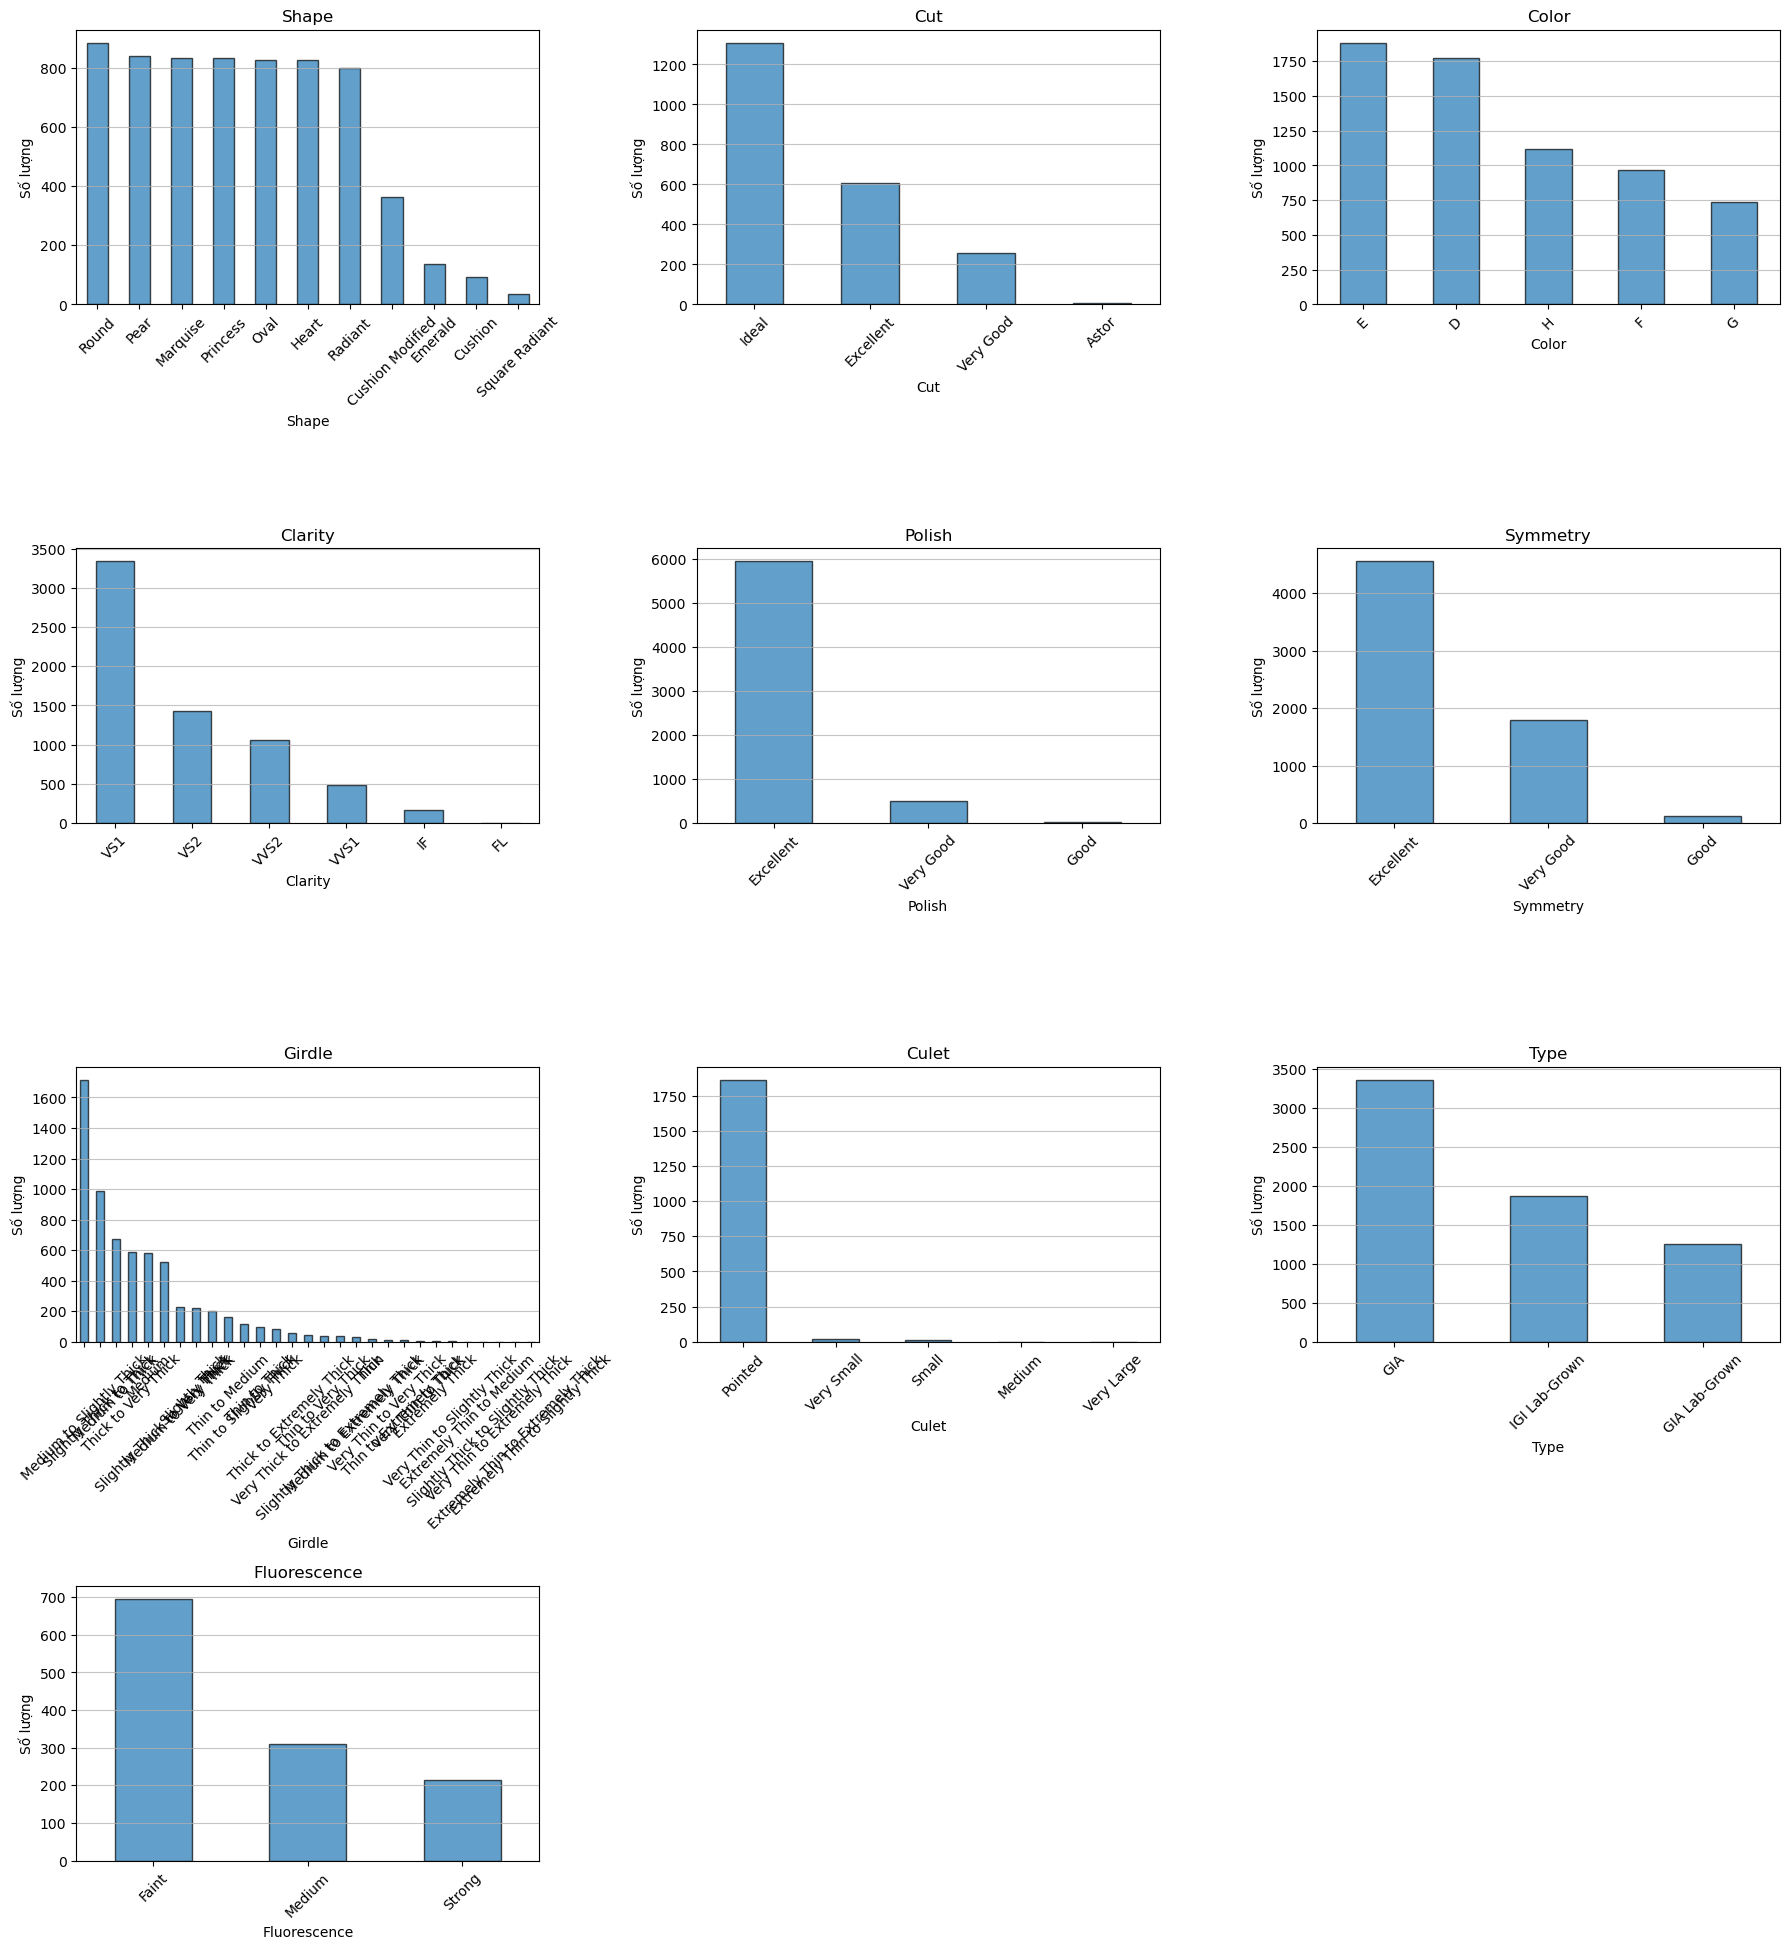

In [103]:
# Vẽ biểu đồ cột cho các cột dạng object (categorical)
import matplotlib.pyplot as plt

# Lọc các cột dạng object
categorical_cols = df.select_dtypes(include=['object']).columns

# Vẽ biểu đồ countplot cho từng cột dạng object
plt.figure(figsize=(18, 24))

for i, col in enumerate(categorical_cols):
    plt.subplot(5, 3, i + 1)
    df[col].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel('Số lượng')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()


In [104]:
df['Shape'].value_counts()

Shape
Round               886
Pear                840
Marquise            835
Princess            833
Oval                828
Heart               826
Radiant             801
Cushion Modified    365
Emerald             137
Cushion              91
Square Radiant       35
Name: count, dtype: int64

In [105]:
# sns.pairplot(df, diag_kind='kde')
# plt.suptitle("Pairplot ", y=1.02)
# plt.show()

Dưới đây là bản dịch tiếng Việt cho các đặc điểm của viên kim cương:

- Shape: Hình dạng của viên kim cương.
- Cut: Độ chất lượng của việc cắt viên kim cương.
- Color: Đánh giá màu sắc của viên kim cương từ D (không màu) đến Z.
- Clarity: Đánh giá độ rõ nét của viên kim cương dựa trên các khuyết điểm.
- Carat Weight: Trọng lượng của viên kim cương tính theo carat.
- Length/Width Ratio: Tỷ lệ giữa chiều dài và chiều rộng của viên kim cương.
- Depth %: Độ sâu của viên kim cương tính theo phần trăm chiều rộng.
- Table %: Chiều rộng của mặt trên (facet) tính theo phần trăm.
- Polish: Chất lượng hoàn thiện bề mặt của viên kim cương.
- Symmetry: Độ chính xác của hình dáng viên kim cương.
- Girdle: Độ dày của cạnh viên kim cương.
- Culet: Kích thước của mặt dưới viên kim cương.
- Length: Chiều dài của viên kim cương tính bằng milimét.
- Width: Chiều rộng của viên kim cương tính bằng milimét.
- Height: Chiều cao của viên kim cương tính bằng milimét.
- Price: Giá của viên kim cương tính bằng đô la Mỹ ($).
- Type: Loại chứng nhận hoặc nguồn gốc của viên kim cương.
- Fluorescence: Mức độ phát sáng dưới tia UV của viên kim cương.

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6482 entries, 0 to 6484
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Shape               6477 non-null   object 
 1   Cut                 2180 non-null   object 
 2   Color               6477 non-null   object 
 3   Clarity             6477 non-null   object 
 4   Carat Weight        6477 non-null   float64
 5   Length/Width Ratio  6477 non-null   float64
 6   Depth %             6475 non-null   float64
 7   Table %             6465 non-null   float64
 8   Polish              6462 non-null   object 
 9   Symmetry            6462 non-null   object 
 10  Girdle              6460 non-null   object 
 11  Culet               1889 non-null   object 
 12  Length              6462 non-null   float64
 13  Width               6462 non-null   float64
 14  Height              6462 non-null   float64
 15  Price               6482 non-null   int64  
 16  Type       

In [107]:
# đếm các giá trị duy nhất trong mỗi cột nunique
df.select_dtypes(object).nunique()

Shape           11
Cut              4
Color            5
Clarity          6
Polish           3
Symmetry         3
Girdle          29
Culet            5
Type             3
Fluorescence     3
dtype: int64

In [108]:
missing_values = df.isnull().sum()
missing_values

Shape                    5
Cut                   4302
Color                    5
Clarity                  5
Carat Weight             5
Length/Width Ratio       5
Depth %                  7
Table %                 17
Polish                  20
Symmetry                20
Girdle                  22
Culet                 4593
Length                  20
Width                   20
Height                  20
Price                    0
Type                     0
Fluorescence          5261
dtype: int64

In [109]:
from sklearn.impute import SimpleImputer

#điền giá tị thiếu cho các cột số bằng giá trị trung vị (median)
imputer_numeric = SimpleImputer(strategy='median')

#điền giá tị thiếu cho các cột phân loại bằng giá trị xuất hiện nhiều nhất(mode)
impute_categorical = SimpleImputer(strategy= 'most_frequent')

# xác định các cột số và cột phân loại 
numeric_col = df.select_dtypes(include=['float64', 'int64']).columns
categorical_col = df.select_dtypes(include=['object']).columns

df[numeric_col] = imputer_numeric.fit_transform(df[numeric_col])

df[categorical_col] = impute_categorical.fit_transform(df[categorical_col])


In [110]:
# Kiểm tra dữ liệu sau khi điền giá trị thiếu
print("Kiểm tra dữ liệu thiếu sau khi điền:")
print(df.isnull().sum())

Kiểm tra dữ liệu thiếu sau khi điền:
Shape                 0
Cut                   0
Color                 0
Clarity               0
Carat Weight          0
Length/Width Ratio    0
Depth %               0
Table %               0
Polish                0
Symmetry              0
Girdle                0
Culet                 0
Length                0
Width                 0
Height                0
Price                 0
Type                  0
Fluorescence          0
dtype: int64


In [111]:
#  Loại bỏ giá trị trùng lặp
# Xóa các hàng bị trùng lặp (nếu có)
# df.drop_duplicates(inplace=True)

In [112]:


numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns # Lọc cột số


# Hàm phát hiện outliers bằng IQR
def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df < lower_bound) | (df > upper_bound)]

# Kiểm tra outliers
for col in numeric_columns:
    outliers = detect_outliers_iqr(df[col]).count()
    print(f'{col}: {outliers}')

Carat Weight: 1336
Length/Width Ratio: 15
Depth %: 4
Table %: 38
Length: 85
Width: 250
Height: 302
Price: 216


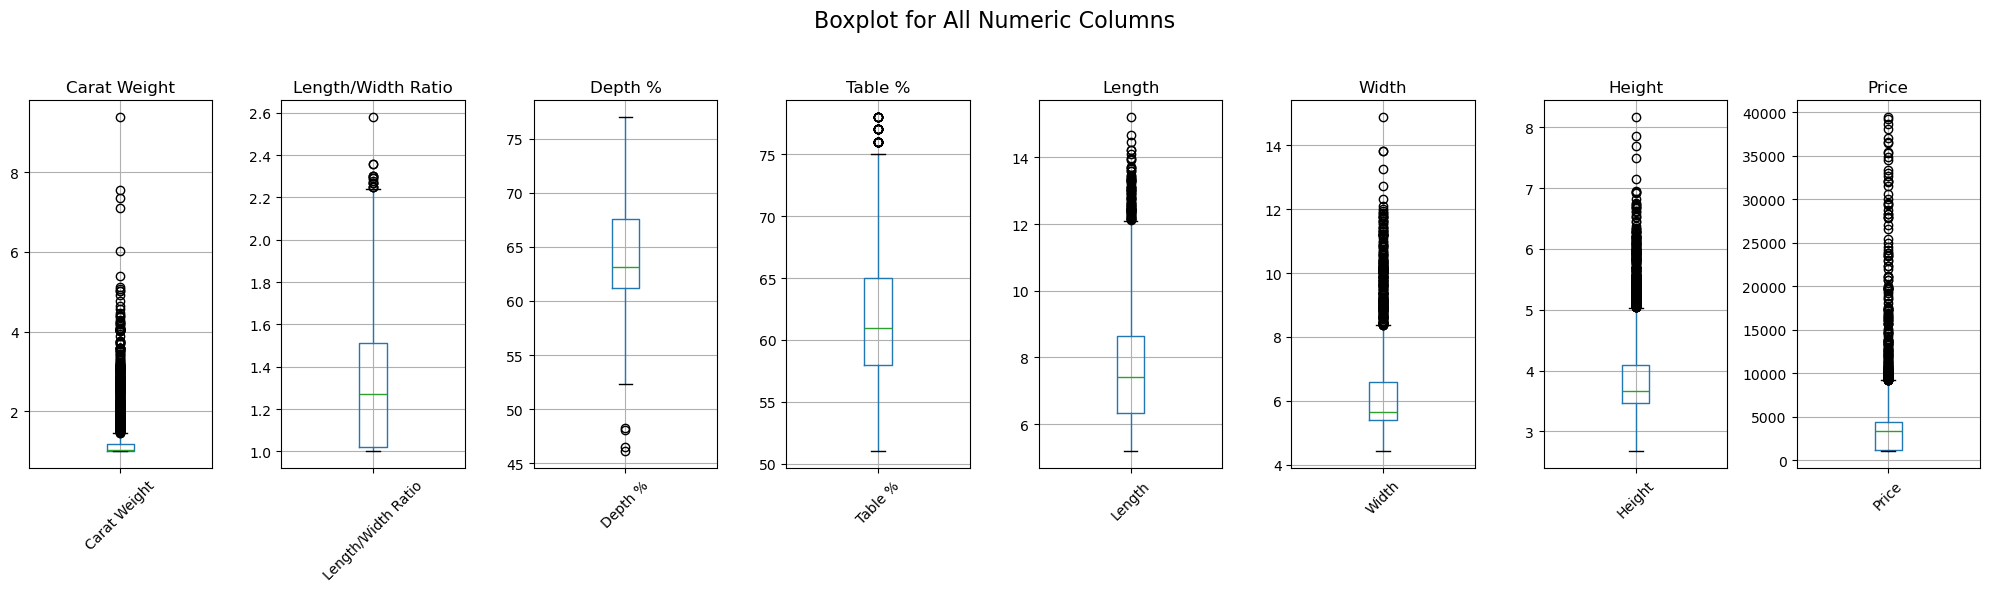

In [113]:
# Tạo subplots với kích thước phù hợp (tùy theo số lượng cột)
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(20, 6))

# Vẽ từng boxplot cho từng cột
for i, col in enumerate(numeric_columns):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'{col}')
    axes[i].tick_params(axis='x', rotation=45)

# Đặt tiêu đề chính cho toàn bộ figure
plt.suptitle('Boxplot for All Numeric Columns', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [114]:
import pandas as pd
import numpy as np

# Lọc các cột dạng số
# numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns  

# Hàm Winsorizing - thay thế outliers bằng giá trị biên
def winsorize_outliers(df, column):
    q1 = df[column].quantile(0.25)  # Quartile 1
    q3 = df[column].quantile(0.75)  # Quartile 3
    iqr = q3 - q1

    # Xác định ngưỡng outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Thay thế các giá trị outliers bằng giá trị biên
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Áp dụng cho từng cột số
for column in numeric_columns:
    df = winsorize_outliers(df, column)

# Kết quả
print(df)


                 Shape    Cut Color Clarity  Carat Weight  Length/Width Ratio  \
0     Cushion Modified  Ideal     F    VVS2          1.46                1.02   
1                 Pear  Ideal     E     VS1          1.20                1.65   
2                 Oval  Ideal     E     VS1          1.19                1.41   
3                Heart  Ideal     D      IF          1.00                1.18   
4              Radiant  Ideal     H     VS1          1.01                1.35   
...                ...    ...   ...     ...           ...                 ...   
6480              Pear  Ideal     F     VS2          1.02                1.54   
6481             Heart  Ideal     E    VVS2          1.00                1.16   
6482          Princess  Ideal     G    VVS1          1.03                1.01   
6483           Radiant  Ideal     E     VS1          1.06                1.43   
6484           Emerald  Ideal     H    VVS1          1.00                1.36   

      Depth %  Table %     

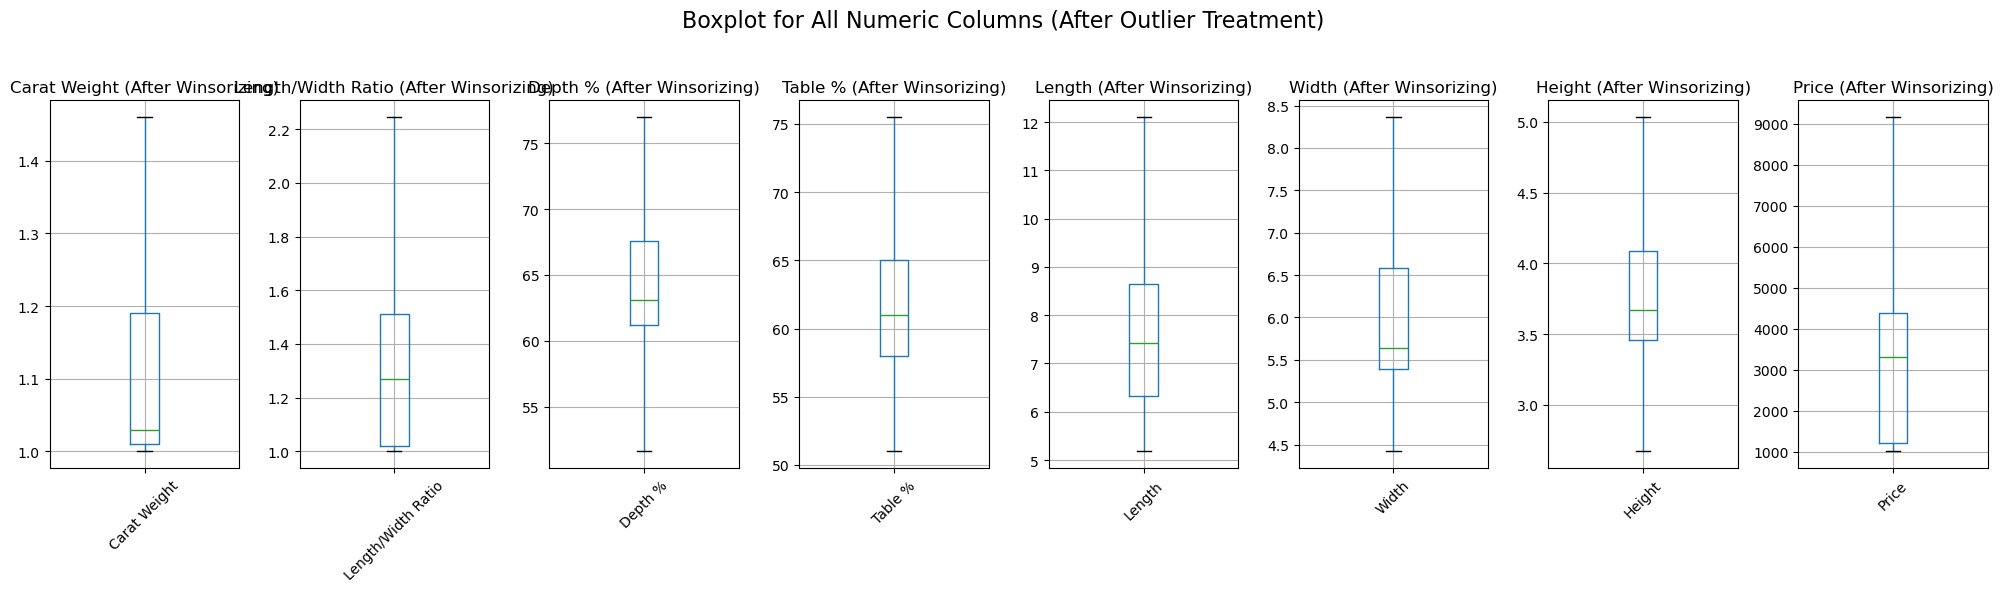

In [115]:


# Tạo subplots với kích thước phù hợp (tùy theo số lượng cột)
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(20, 6))

# Vẽ từng boxplot cho từng cột sau khi xử lý outliers
for i, col in enumerate(numeric_columns):
    df.boxplot(column=col, ax=axes[i])
    axes[i].set_title(f'{col} (After Winsorizing)')
    axes[i].tick_params(axis='x', rotation=45)

# Đặt tiêu đề chính cho toàn bộ figure
plt.suptitle('Boxplot for All Numeric Columns (After Outlier Treatment)', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [116]:
df = pd.get_dummies(df, drop_first=True)
df

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price,Shape_Cushion Modified,Shape_Emerald,...,Girdle_Very Thin to Thick,Girdle_Very Thin to Very Thick,Culet_Pointed,Culet_Small,Culet_Very Large,Culet_Very Small,Type_GIA Lab-Grown,Type_IGI Lab-Grown,Fluorescence_Medium,Fluorescence_Strong
0,1.46,1.02,65.8,59.0,7.09,6.95,4.57,2640.0,True,False,...,False,False,True,False,False,False,True,False,False,False
1,1.20,1.65,62.5,58.0,9.64,5.86,3.66,1070.0,False,False,...,False,False,True,False,False,False,True,False,False,False
2,1.19,1.41,63.1,63.0,8.44,6.00,3.79,1070.0,False,False,...,False,False,True,False,False,False,True,False,False,False
3,1.00,1.18,61.7,58.0,5.85,6.89,4.25,7110.0,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1.01,1.35,69.4,66.0,6.80,5.05,3.50,3050.0,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,1.02,1.54,62.9,63.0,8.60,5.59,3.51,3760.0,False,False,...,False,False,True,False,False,False,False,False,True,False
6481,1.00,1.16,58.3,59.0,6.05,6.99,4.07,4710.0,False,False,...,False,False,True,False,False,False,False,False,False,True
6482,1.03,1.01,72.6,71.0,5.59,5.51,4.00,3270.0,False,False,...,False,False,True,False,False,False,False,False,False,False
6483,1.06,1.43,67.8,62.0,7.24,5.05,3.42,1050.0,False,False,...,False,False,True,False,False,False,True,False,False,False


In [117]:
#True sẽ trở thành 1, và False trở thành 0.
df = df.astype(float)
df

,Carat Weight,Length/Width Ratio,Depth %,Table %,Length,Width,Height,Price,Shape_Cushion Modified,Shape_Emerald,...,Girdle_Very Thin to Thick,Girdle_Very Thin to Very Thick,Culet_Pointed,Culet_Small,Culet_Very Large,Culet_Very Small,Type_GIA Lab-Grown,Type_IGI Lab-Grown,Fluorescence_Medium,Fluorescence_Strong
0,1.46,1.02,65.8,59.0,7.09,6.95,4.57,2640.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.20,1.65,62.5,58.0,9.64,5.86,3.66,1070.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.19,1.41,63.1,63.0,8.44,6.00,3.79,1070.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.00,1.18,61.7,58.0,5.85,6.89,4.25,7110.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.01,1.35,69.4,66.0,6.80,5.05,3.50,3050.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6480,1.02,1.54,62.9,63.0,8.60,5.59,3.51,3760.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6481,1.00,1.16,58.3,59.0,6.05,6.99,4.07,4710.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6482,1.03,1.01,72.6,71.0,5.59,5.51,4.00,3270.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6483,1.06,1.43,67.8,62.0,7.24,5.05,3.42,1050.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [118]:
# chuẩn hoá# chuẩn hoá
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [119]:
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# pca = PCA()
# pca.fit(x)

# # Vẽ biểu đồ phương sai
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(pca.explained_variance_ratio_)+1), 
#          pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
# plt.xlabel('Number of Principal Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance by Principal Components')
# plt.grid(True)
# plt.show()

In [120]:
df = pd.DataFrame(df)

In [121]:
df

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,1.849410,-0.951914,0.333909,-0.596188,-0.342864,0.937868,1.396728,-0.315596,4.093764,-0.146942,...,-0.035153,-0.046524,0.068189,-0.039308,-0.012422,-0.05277,2.042837,-0.637718,-0.224493,-0.185221
1,0.394088,0.985798,-0.359088,-0.807536,1.214024,-0.186771,-0.383492,-1.076298,-0.244274,-0.146942,...,-0.035153,-0.046524,0.068189,-0.039308,-0.012422,-0.05277,2.042837,-0.637718,-0.224493,-0.185221
2,0.338114,0.247622,-0.233088,0.249202,0.481371,-0.042322,-0.129175,-1.076298,-0.244274,-0.146942,...,-0.035153,-0.046524,0.068189,-0.039308,-0.012422,-0.05277,2.042837,-0.637718,-0.224493,-0.185221
3,-0.725390,-0.459796,-0.527087,-0.807536,-1.099940,0.875961,0.770717,1.850225,-0.244274,-0.146942,...,-0.035153,-0.046524,0.068189,-0.039308,-0.012422,-0.05277,-0.489515,-0.637718,-0.224493,-0.185221
4,-0.669416,0.063078,1.089904,0.883246,-0.519922,-1.022512,-0.696497,-0.116941,-0.244274,-0.146942,...,-0.035153,-0.046524,0.068189,-0.039308,-0.012422,-0.05277,-0.489515,-0.637718,-0.224493,-0.185221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6477,-0.613442,0.647467,-0.275088,0.249202,0.579058,-0.465351,-0.676934,0.227070,-0.244274,-0.146942,...,-0.035153,-0.046524,0.068189,-0.039308,-0.012422,-0.05277,-0.489515,-0.637718,4.454486,-0.185221
6478,-0.725390,-0.521311,-1.241083,-0.596188,-0.977831,0.979139,0.418585,0.687368,-0.244274,-0.146942,...,-0.035153,-0.046524,0.068189,-0.039308,-0.012422,-0.05277,-0.489515,-0.637718,-0.224493,5.398966
6479,-0.557468,-0.982671,1.761901,1.939984,-1.258681,-0.547893,0.281645,-0.010346,-0.244274,-0.146942,...,-0.035153,-0.046524,0.068189,-0.039308,-0.012422,-0.05277,-0.489515,-0.637718,-0.224493,-0.185221
6480,-0.389546,0.309137,0.753906,0.037855,-0.251283,-1.022512,-0.853000,-1.085989,-0.244274,-0.146942,...,-0.035153,-0.046524,0.068189,-0.039308,-0.012422,-0.05277,2.042837,-0.637718,-0.224493,-0.185221


In [122]:
X = df.drop(columns=7)
y = df[7]

In [123]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA()
pca.fit(X)

PCA()

In [124]:
# xem phương sai giải thích của các thành phần chính
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)


[7.19319308e-02 6.25615261e-02 4.70543255e-02 4.07567466e-02
 3.60091984e-02 2.59176552e-02 2.27811522e-02 2.08904461e-02
 1.95333603e-02 1.91910389e-02 1.87904058e-02 1.81348988e-02
 1.79716256e-02 1.76620872e-02 1.73144460e-02 1.71141588e-02
 1.65892703e-02 1.63068781e-02 1.61868772e-02 1.59960011e-02
 1.55103832e-02 1.54725876e-02 1.53504837e-02 1.52750236e-02
 1.50781947e-02 1.49217086e-02 1.48887571e-02 1.47831858e-02
 1.47006361e-02 1.46523972e-02 1.45984988e-02 1.45507160e-02
 1.45222492e-02 1.44869341e-02 1.43820007e-02 1.43140485e-02
 1.42438695e-02 1.41379798e-02 1.38492817e-02 1.37858329e-02
 1.34092620e-02 1.32054954e-02 1.30228487e-02 1.24554640e-02
 1.22606597e-02 1.15054743e-02 1.13265361e-02 1.08853420e-02
 1.03424046e-02 1.01440003e-02 9.54062493e-03 7.64915700e-03
 6.22108964e-03 5.84249807e-03 5.36913182e-03 4.11858842e-03
 3.32244472e-03 2.32917306e-03 1.70294328e-03 1.21438011e-03
 6.84102140e-04 5.18830463e-04 2.23506562e-04 1.99041698e-04
 1.34682789e-04 7.223653

In [125]:
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print(cumulative_explained_variance)

[0.07193193 0.13449346 0.18154778 0.22230453 0.25831373 0.28423138
 0.30701253 0.32790298 0.34743634 0.36662738 0.38541779 0.40355268
 0.42152431 0.4391864  0.45650084 0.473615   0.49020427 0.50651115
 0.52269803 0.53869403 0.55420441 0.569677   0.58502748 0.60030251
 0.6153807  0.63030241 0.64519117 0.65997435 0.67467499 0.68932739
 0.70392589 0.7184766  0.73299885 0.74748578 0.76186779 0.77618183
 0.7904257  0.80456368 0.81841296 0.8321988  0.84560806 0.85881356
 0.8718364  0.88429187 0.89655253 0.908058   0.91938454 0.93026988
 0.94061228 0.95075629 0.96029691 0.96794607 0.97416716 0.98000965
 0.98537879 0.98949737 0.99281982 0.99514899 0.99685194 0.99806632
 0.99875042 0.99926925 0.99949276 0.9996918  0.99982648 0.99989872
 0.99995971 0.99997994 1.        ]


In [126]:
# lựa chọn số thành phần chính (>= 95%)
n_components = np.argmax(cumulative_explained_variance >= 0.70) + 1
print('Số lượng thành phần chính được chọn', n_components)

Số lượng thành phần chính được chọn 31


In [127]:
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X)
X_pca_reduced

array([[ 2.18998172e+00, -2.94752614e-01,  9.05517321e-01, ...,
        -2.26748032e-01,  4.19900424e-01, -5.95633898e-01],
       [-3.74201383e-01,  2.06643831e+00, -5.00581621e-01, ...,
        -2.00296911e-02,  1.71527129e-01, -1.67802858e-01],
       [-1.60504185e-01,  9.70314579e-01, -1.32201623e-03, ...,
        -4.24537905e-01,  8.40917220e-02, -4.30315552e-01],
       ...,
       [-1.15526150e+00, -3.17016743e+00,  1.71336938e+00, ...,
        -5.87094983e-02, -6.12294821e-01, -1.24505479e-01],
       [-8.93756488e-01, -1.17002535e-01,  1.51114086e+00, ...,
         3.73863169e-02,  5.08213893e-02,  1.39627470e-01],
       [-2.45625966e+00, -2.23192886e+00, -6.28141209e-01, ...,
         1.08293697e-01, -6.98164060e-01,  4.06745141e-01]])

In [128]:
X_pca_reduced.shape

(6482, 31)

In [129]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [130]:
#khởi tạp mô hìnhhình
rf_model.fit(X_pca_reduced, y)
#huấn luyện mô hình
y_pred_rf = rf_model.predict(X_pca_reduced)
from sklearn.metrics import mean_squared_error, r2_score
# Đánh giá mô hình
mse_rf = mean_squared_error(y, y_pred_rf)
r2_rf = r2_score(y, y_pred_rf)

print("Random Forest - MSE:", mse_rf)
print("Random Forest - R2 Score:", r2_rf)

Random Forest - MSE: 0.0289667871539023
Random Forest - R2 Score: 0.9710332128460977


In [131]:
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# Khởi tạo mô hình XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_pca_reduced, y)

# Dự đoán
y_pred_xgb = xgb_model.predict(X_pca_reduced)

# Đánh giá mô hình XGBoost
mse_xgb = mean_squared_error(y, y_pred_xgb)
r2_xgb = r2_score(y, y_pred_xgb)

print("XGBoost - MSE:", mse_xgb)
print("XGBoost - R2 Score:", r2_xgb)


XGBoost - MSE: 0.013731255508611524
XGBoost - R2 Score: 0.9862687444913885


In [132]:
from sklearn.metrics import mean_squared_error, r2_score
from lightgbm import LGBMRegressor

# Khởi tạo mô hình LightGBM
lgbm_model = LGBMRegressor(random_state=42)
lgbm_model.fit(X_pca_reduced, y)

# Dự đoán
y_pred_lgbm = lgbm_model.predict(X_pca_reduced)

# Đánh giá mô hình LightGBM
mse_lgbm = mean_squared_error(y, y_pred_lgbm)
r2_lgbm = r2_score(y, y_pred_lgbm)

print("LightGBM - MSE:", mse_lgbm)
print("LightGBM - R2 Score:", r2_lgbm)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 6482, number of used features: 31
[LightGBM] [Info] Start training from score -0.000000
LightGBM - MSE: 0.07499596299914578
LightGBM - R2 Score: 0.9250040370008542
